## Polynomial Regression 

In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from numpy.linalg import inv
from numpy import dot,power
from utils import *

### Declare Variables 

In [4]:
nb_var_in = 1 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 40  #Number of datapoints

### Generate Data 

Text(0.5, 1.0, 'Data points')

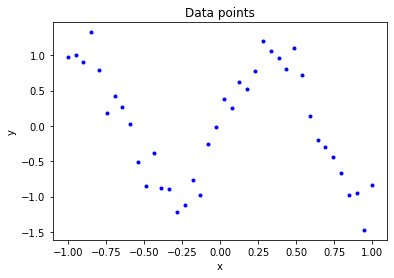

In [5]:
x = np.linspace(-1,1,nb_data)
Y = np.sin(5*x)[:,None] + np.random.normal(size=(nb_data, nb_var_out))*2e-1 
#adding [:,None] is numpy trick to add one more dimension to the array, from (nb_data) to (nb_data,1)

plt.plot(x,Y, '.b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')

### Solve the Regression Problem

#### Project x to higher dimensions by polynomial expansion with degree d $\rightarrow$ X = $[x^0, x^1, ..., x^d]$

In [6]:
degree_pol = 5
X = power(x,0)
for i in range(1,degree_pol+1):
    X = np.vstack([X, power(x,i)])
X = X.T

#alternative: use sklearn library
#from sklearn.preprocessing import PolynomialFeatures
#poly_func = PolynomialFeatures(degree=degree_pol)
#X = poly_func.fit_transform(x[:,None]) 

#### Solve the regression problem XA = Y 

#### 1. Standard LS 

In [8]:
A = dot(inv(dot(X.T,X)),dot(X.T, Y)) 
e = np.linalg.norm(dot(X,A)-Y)
plot_title = 'Least squares - Polynomial fit of degree ' + str(nb_var_in) + ' (e={0:0.2f})'.format(e)
print(e)

1.3248070732405586


#### 2. Ridge Regression 

In [9]:
#Naive computation of ridge regression
lamda = 1e-01
Gamma = np.eye(degree_pol+1)*lamda
A = dot(inv(dot(X.T,X) + dot(Gamma.T,Gamma)),dot(X.T, Y)) 
e = np.linalg.norm(dot(X,A)-Y)
plot_title = 'Ridge Regression: Least squares - Polynomial fit of degree ' + str(degree_pol+1) + ' (e={0:0.2f})'.format(e)
print(e)

1.5312609612131747


In [10]:
#Ridge regression computed with augmented matrices
lamda = 1e-01
Gamma = np.eye(degree_pol+1)*lamda
Xa = np.vstack([X, Gamma])
Ya = np.vstack([Y, np.zeros((degree_pol+1, nb_var_out))])
A = dot(inv(dot(Xa.T,Xa)),dot(Xa.T, Ya)) 
e = np.linalg.norm(dot(X,A)-Y)
plot_title = 'Ridge Regression: Least squares - Polynomial fit of degree ' + str(degree_pol+1) + ' (e={0:0.2f})'.format(e)
print(e)

1.5312609612131631


In [11]:
#Ridge regression computed with SVD
lamda = 1e-01
U,S,V = np.linalg.svd(X)

#Ridge regression computed with SVD
for i in range(len(S)):
    S[i] = S[i]/(S[i]**2 + lamda**2)
S_mat = np.vstack([np.diag(S), np.zeros((34,degree_pol+1))])
A = dot(V.T, dot(S_mat.T, dot(U.T, Y)))
e = np.linalg.norm(dot(X,A)-Y)
plot_title = 'Ridge Regression: Least squares - Polynomial fit of degree ' + str(degree_pol+1) + ' (e={0:0.2f})'.format(e)
print(e)

1.531260961213173


#### Plot the predictive data (as line) and the true data (as points)

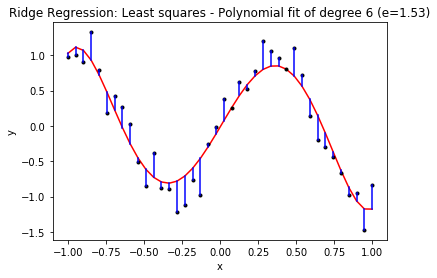

In [12]:
Y_pred = np.dot(X,A)
plot_data_2D(x,Y,Y_pred, title=plot_title)

## Polynomial Regression with Nullspace 
In the equation XA = Y, with X $\in \mathbb{R}^{M \times N}$, we can obtain the nullspace of X when M < N. In our current problem, M is the number of data points while N is the polynomial degree + 1. This means that we can have the nullspace when the number of data points is lower than the degree of the polynomials.

### Generate Data 

Text(0.5, 1.0, 'Data points')

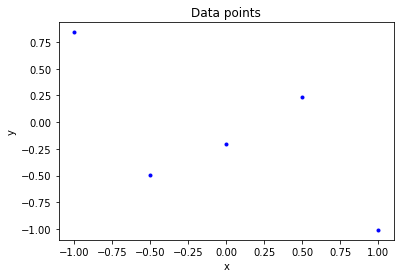

In [13]:
nb_data = 5  #Number of datapoints
x = np.linspace(-1,1,nb_data)
Y = np.sin(5*x)[:,None] + np.random.normal(size=(nb_data, nb_var_out))*2e-1 
#adding [:,None] is numpy trick to add one more dimension to the array, from (nb_data) to (nb_data,1)

plt.plot(x,Y, '.b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')

### Construct X as polynomial expansion of x with degree = degree_pol

In [14]:
from sklearn.preprocessing import PolynomialFeatures

degree_pol = 8
poly_func = PolynomialFeatures(degree=degree_pol)
X = poly_func.fit_transform(x[:,None]) 

### Calculate the Nullspace Operator $N = \textrm{I} - X^{\dagger}X $

In [15]:
X_pinv =  dot(X.T, inv(dot(X,X.T)))
N = np.eye(degree_pol+1) - dot(X_pinv,X)

### Calculate the prediction

Text(0.5, 1.0, 'Sample predictions using the nullspace')

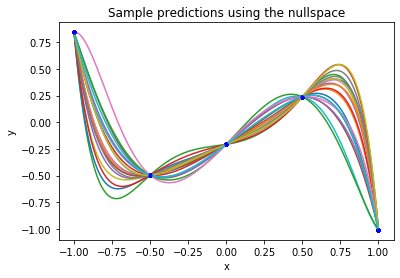

In [16]:
x_pred = np.linspace(-1,1,200)
X_pred = poly_func.fit_transform(x_pred[:,None])
for n in range(20):
    v = 5*np.random.rand(degree_pol+1)[:,None]
    A_cur = dot(X_pinv,Y) + dot(N,v) #compute different A by using the nullspace
    Y_pred = dot(X_pred,A_cur)
    plt.plot(x_pred,Y_pred)
    plt.plot(x,Y,'.b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample predictions using the nullspace')